## Final Project Submission

Please fill out: 

*Student name: OOKO GRACE ANYANGO

*Student pace: full time

*Scheduled project review date/time: 

*Instructor name:ANTONY MUIKO 

*Blog post URL:


DESCRIBING THE QUESTION

1.BUSINESS PROBLEM

Microsoft wants to start a movie making industry. They don't have the knowlede to jump into the industry. I have been tasked to to assist with goal. I have based my analysis on a few factors. The task is to extract data from movie stations. In this project I will investigate the practices that are foundational for award winning film and also a profitable film.

2.BUSINESS VALUE

a.A successful movie studio will generate revenue for Microsoft.

b.It will increase subscription

c.It will improve brand recognition

3.METHODOLOGY

Analyze past movie data to make recommendations to Microsoft on how to be successful in the movie industry;
   a) Best month to release the movie
   b) Which rating are mostly popular by genre ids
   c) Which language have the most popular movies
   d) Which movies are popular by vote_count
   e) Which movie has the highest vote average
   f) Which movie has the highest vote_count
   
4 EXPERIMENTAL DESIGN

1.Loading Datasets and Preparing the Data.

2.Data Cleaning to deal with .

3.Data Exploration and Analysis (Univariate and Bivariate Analysis).

4.Hypothesis Testing to Implement the Solution.

5.Conclusions and Recommendation.


# DATA UNDERSTANDING

In [151]:
#importing the packages
#for manipulations
import pandas as pd
import numpy as np

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [156]:
#reading the csv file
df = pd.read_csv("tmdb.movies.csv.")
df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [19]:
#previewing the Dataframe
df.head() #This print the first five data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


The above dataset looks structured and though we have a unnamed colunm.

In [41]:
#getting info for Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [23]:
#getting the last 5 data
df.tail(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [24]:
#getting the number of rows and columns
df.shape

(26517, 10)

The dataset has 26517 rows and 10 columns.

In [147]:
type(df)

pandas.core.frame.DataFrame

In [70]:
print(list(df.columns.values))

['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count']


In [25]:
#getting descriptive statistics
df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [26]:
#finding correlation between variables
df.corr()

,Unnamed: 0,id,popularity,vote_average,vote_count
Unnamed: 0,1.000000,0.836647,0.028741,0.086375,-0.022948
id,0.836647,1.000000,-0.148720,0.116085,-0.130221
popularity,0.028741,-0.148720,1.000000,0.065273,0.694849
vote_average,0.086375,0.116085,0.065273,1.000000,0.086370
vote_count,-0.022948,-0.130221,0.694849,0.086370,1.000000


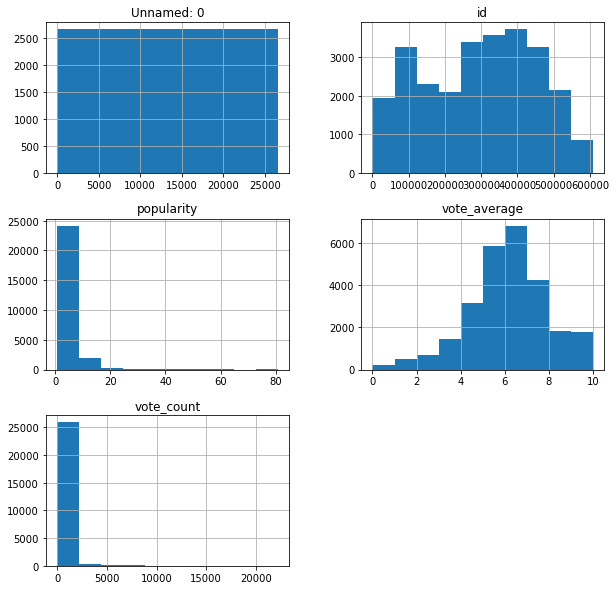

In [54]:
#visualize the data by colum to examine the data
df.hist(figsize = (10,10));

# DATA PREPARATION AND CLEANING

In [27]:
#checking for null values
df.isnull()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
26512,False,False,False,False,False,False,False,False,False,False
26513,False,False,False,False,False,False,False,False,False,False
26514,False,False,False,False,False,False,False,False,False,False
26515,False,False,False,False,False,False,False,False,False,False


In [28]:
df.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

There is no null values.

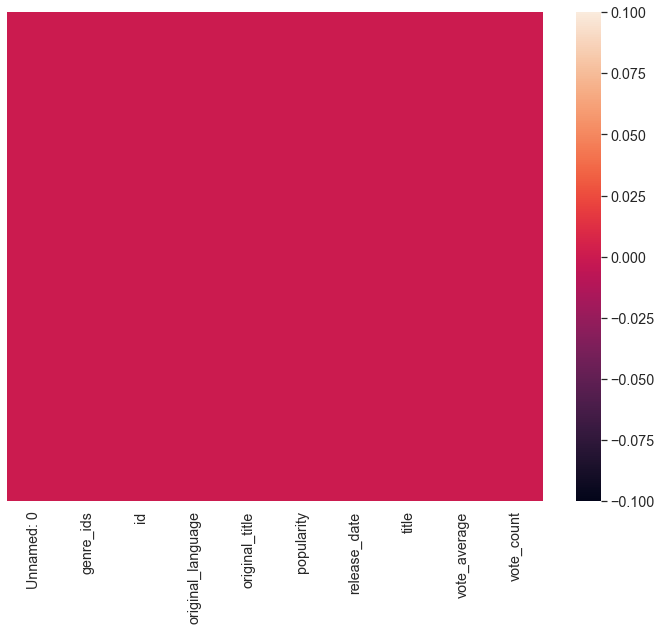

In [126]:
#we can also visualize if we have any null values
sns.heatmap(df.isnull(), yticklabels=False);

Because it is totallly pink that means the dataset is perfect.If the data had missing values we could have used .dropna() or .fillna() or interpolation to handle the null vallues.

In [31]:
#identifying duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26512    False
26513    False
26514    False
26515    False
26516    False
Length: 26517, dtype: bool

In [32]:
df.duplicated().sum()

0

There are no two  rows that are duplicated.

In [34]:
#in a particular column or series how many duplicate rows are there.
df['genre_ids'].duplicated().sum()

24040

In [35]:
#let us see for example the firts 5 rows which are duplicated.
df[df['genre_ids'].duplicated()].head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
10,10,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
31,31,"[18, 36]",568,en,Apollo 13,15.855,1995-06-30,Apollo 13,7.4,2821
33,33,"[28, 18, 9648, 53]",2503,en,The Bourne Ultimatum,15.620,2007-08-03,The Bourne Ultimatum,7.4,4440


In [36]:
df['genre_ids'].shape

(26517,)

In [40]:
df['genre_ids'].drop_duplicates().shape

(2477,)

# DATA ANALYSIS

EXPLORATORY DATA ANALYSIS

UNIVARIATE

NUMERICAL

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


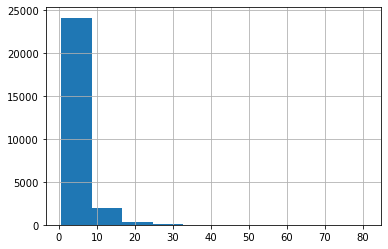

In [65]:
# draw the histogram of popularity
df.popularity.hist();

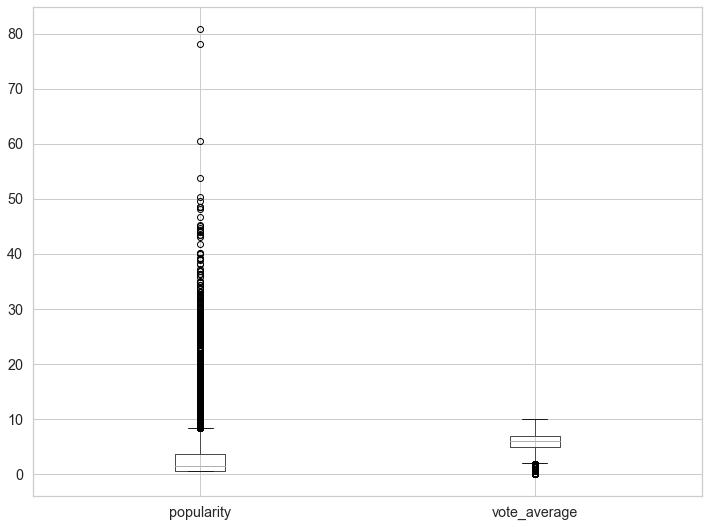

In [102]:
#checking for outliers
df.boxplot(column=['popularity', 'vote_average']);

-Popularity has outliers 4 outliers between 54, 60,78 and 80.

-vote_average has no outliers

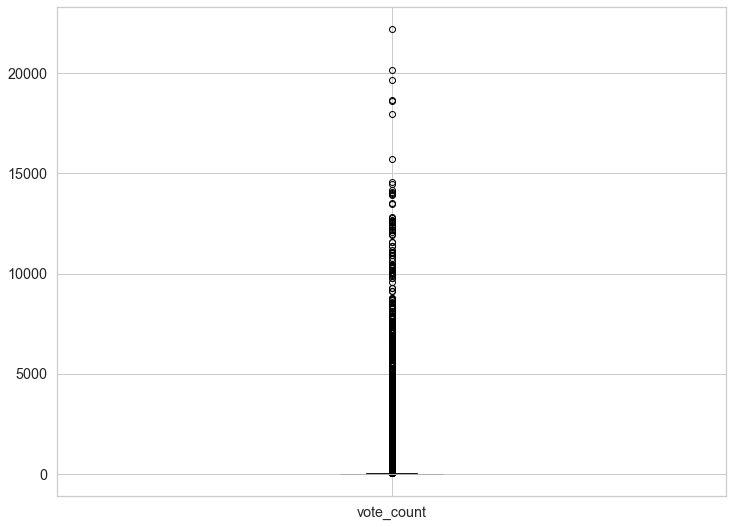

In [110]:
df.boxplot(column=['vote_count']);

-vote_count column also has outliers

1. What is the average vote distribution?

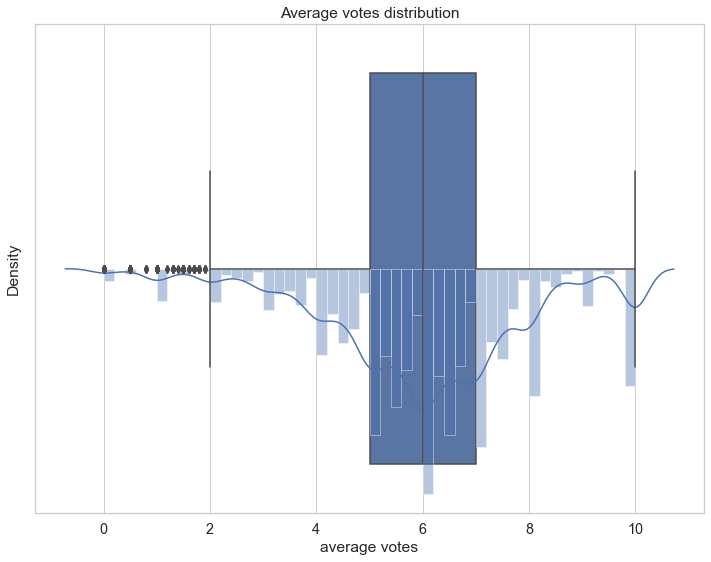

In [89]:

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)
temp_df = df[['vote_average']]
sns.set_style('whitegrid')
ax = sns.distplot(temp_df.vote_average)
ax = sns.boxplot(x = temp_df.vote_average)
ax.set_title('Average votes distribution')
ax.set_xlabel('average votes');

2. Top 10 movies by popluarity

In [80]:
#top 10 movies by popularity
top_movie_by_pop = df.sort_values(by = ['popularity'], ascending = False)[['original_title','popularity']].head(10)
top_movie_by_pop.reset_index(drop=True, inplace=True)
top_movie_by_pop.set_index('original_title', inplace=True)
top_movie_by_pop

,popularity
original_title,
Avengers: Infinity War,80.773
John Wick,78.123
Spider-Man: Into the Spider-Verse,60.534
The Hobbit: The Battle of the Five Armies,53.783
The Avengers,50.289
Guardians of the Galaxy,49.606
Blade Runner 2049,48.571
Blade Runner 2049,48.571
Fantastic Beasts: The Crimes of Grindelwald,48.508


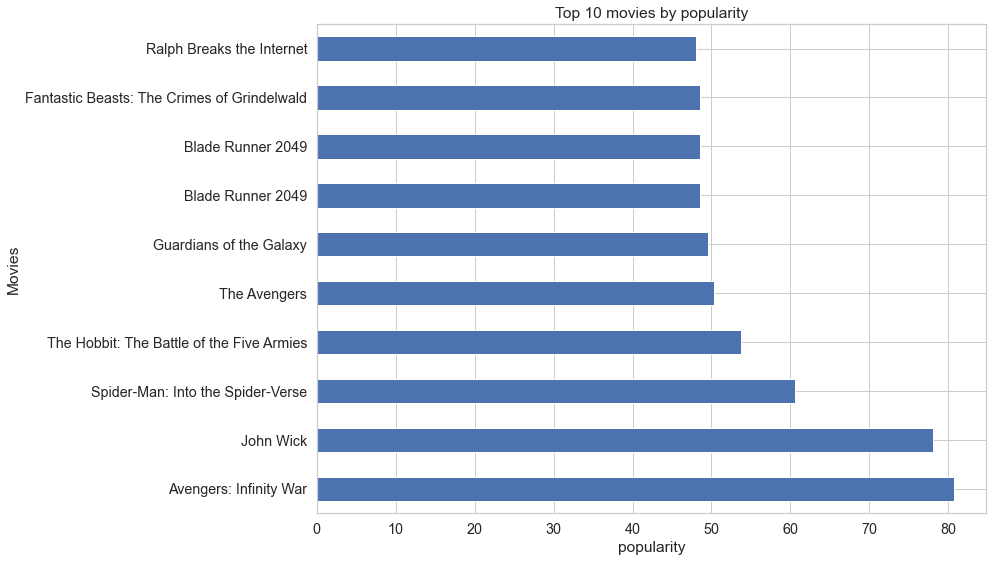

In [82]:
top_movie_by_pop.popularity.plot(kind='barh')
plt.title('Top 10 movies by popularity')
plt.ylabel('Movies')
plt.xlabel('popularity');

OBSERVATIONS
 - Avengers:Infinity war, John wick, Spider-Man are the top 3 movies based on popularity.

In [85]:
df.genre_ids.unique()

array(['[12, 14, 10751]', '[14, 12, 16, 10751]', '[12, 28, 878]', ...,
       '[18, 14, 27, 878, 10749, 53]', '[16, 27, 9648]',
       '[10751, 12, 28]'], dtype=object)

3.Top 10 movies by average votes


In [91]:
top_10_movies_by_vote = df.sort_values(by= ['vote_average'], ascending = False)[['original_title','vote_average']].head(10)
top_10_movies_by_vote.reset_index(drop=True, inplace=True)
top_10_movies_by_vote.set_index('original_title', inplace=True)
top_10_movies_by_vote

,vote_average
original_title,
9/11: Simulations,10.0
Lasagna Cat - Telephone Sex Survey Results,10.0
MOTO 9: The Movie,10.0
The Letter Carrier,10.0
Hope This Goes Over Well/Living in an Empty World,10.0
Die Kinder lassen Grüssen,10.0
Kinda Cool to Expend This Much Drool,10.0
Margo Price - Live at Austin City Limits 10-03-2016,10.0
Morsefest 2015: Question Mark,10.0


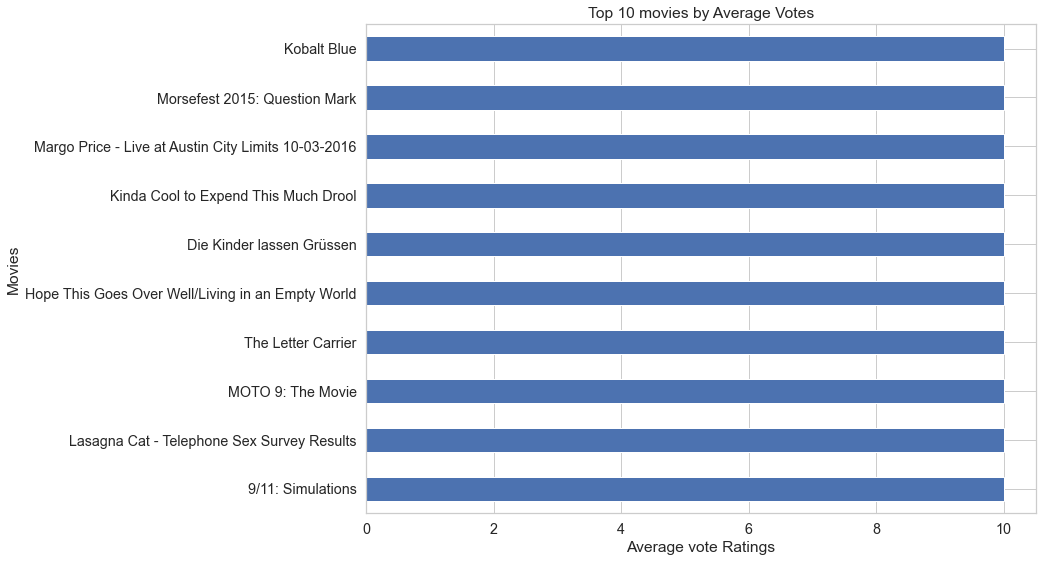

In [92]:
top_10_movies_by_vote.vote_average.plot(kind='barh')
plt.title('Top 10 movies by Average Votes')
plt.ylabel('Movies')
plt.xlabel('Average vote Ratings');

OBSERVATIONS
 -Above are the top 10 movies by vote ratings
 -9/11:simulations all the way to kobalt Blue have the same rating.

4. Which language has got the most popular movies

In [130]:
#getting the top which language has got the most popular movies
top_movie_by_pop = df.sort_values(by = ['popularity'], ascending = False)[['original_language','popularity']].head(20)
top_movie_by_pop.reset_index(drop=True, inplace=True)
top_movie_by_pop.set_index('original_language', inplace=True)
top_movie_by_pop

,popularity
original_language,
en,80.773
en,78.123
en,60.534
en,53.783
en,50.289
en,49.606
en,48.571
en,48.571
en,48.508


-English language has got the most popular movies

5. Which months has popular movies

In [141]:
top_movie_by_pop = df.sort_values(by = ['popularity'], ascending = False)[['release_date','popularity']].head(10)
top_movie_by_pop.reset_index(drop=True, inplace=True)
top_movie_by_pop.set_index('release_date', inplace=True)
top_movie_by_pop

,popularity
release_date,
2018-04-27,80.773
2014-10-24,78.123
2018-12-14,60.534
2014-12-17,53.783
2012-05-04,50.289
2014-08-01,49.606
2017-10-06,48.571
2017-10-06,48.571
2018-11-16,48.508


6 Which movie genre_ids are most popular

In [145]:
top_movie_by_pop = df.sort_values(by = ['popularity'], ascending = False)[['original_title','popularity']].head(20)
top_movie_by_pop.reset_index(drop=True, inplace=True)
top_movie_by_pop.set_index('original_title', inplace=True)
top_movie_by_pop

df.sort_values(by = ['popularity'], ascending = False).head(20)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


28 is the most popular genre_id, 12 is also pretty popular

2ND DATASET

In [190]:
df  = pd.read_csv('tn.movie_budgets.csv')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


SECOND DATASET

DATA UNDERSTANDING

In [177]:
#checking for the to 10 movies
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [179]:
#getting the number of rows and columns
df.shape

(5782, 6)

In [180]:
#general descriptive statistics
df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [181]:
#checking for columns
df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [182]:
df.tail(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


DATA CLEANING

In [183]:
df.isnull()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5777,False,False,False,False,False,False
5778,False,False,False,False,False,False
5779,False,False,False,False,False,False
5780,False,False,False,False,False,False


In [184]:
#checking for missing values
df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There is no missing values

In [185]:
#checking for duplicated values
df.duplicated().sum()

0

There are no duplicated values

In [192]:
#assessing the production budget
df.sort_values(by = ['production_budget'], ascending = False).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,7,"Nov 6, 2015",The Peanuts Movie,"$99,000,000","$130,178,411","$250,091,610"
407,8,"Feb 8, 2019",The LEGO Movie 2: The Second Part,"$99,000,000","$105,806,508","$190,325,698"
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"
5326,27,"Jun 1, 2007",And Then Came Love,"$989,000","$8,158","$8,158"
409,10,"May 4, 2001",The Mummy Returns,"$98,000,000","$202,007,640","$435,040,395"
410,11,"Dec 20, 2002",Gangs of New York,"$97,000,000","$77,730,500","$183,124,621"
411,12,"May 19, 2017",Alien: Covenant,"$97,000,000","$74,262,031","$238,521,247"
5332,33,"Mar 3, 2015",Ask Me Anything,"$950,000",$0,$0
5331,32,"Aug 12, 2014",Jesse,"$950,000",$0,$0
5327,28,"Apr 14, 2006",Hard Candy,"$950,000","$1,024,640","$8,267,066"


We can see above that The Peanuts movie, The LEGO movie;second part are among the movies with highest production budget. We can also see that some higher budget are associated with higher worldwide and domestic gross. Thismeans that higher budget movies tend to be more popular and raise the highest profits. 

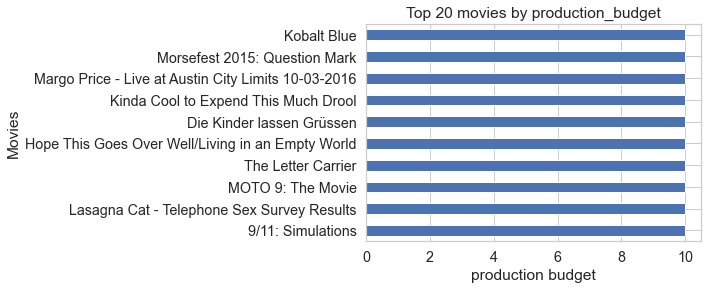

In [223]:
top_10_movies_by_vote.vote_average.plot(kind='barh')
plt.title('Top 10 movies by production_budget')
plt.ylabel('Movies')
plt.xlabel('production budget');

In [199]:
#loading data
df = pd.read_csv('bom.movie_gross.csv')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


DATA UNDERSTANDING

In [200]:
#checking the first 5 data
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [201]:
#checking the last 5 data
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [202]:
df.shape

(3387, 5)

In [203]:
#checking the descriptive statistics
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [204]:
#getting the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


DATA CLEANING

In [205]:
#Checking for null values
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [212]:
#using dropna
df = df.dropna()
print(df)

                                                  title        studio  \
0                                           Toy Story 3            BV   
1                            Alice in Wonderland (2010)            BV   
2           Harry Potter and the Deathly Hallows Part 1            WB   
3                                             Inception            WB   
4                                   Shrek Forever After          P/DW   
...                                                 ...           ...   
3275                                    I Still See You           LGF   
3286                              The Catcher Was a Spy           IFC   
3309                                         Time Freak    Grindstone   
3342  Reign of Judges: Title of Liberty - Concept Short  Darin Southa   
3353            Antonio Lopez 1970: Sex Fashion & Disco            FM   

      domestic_gross foreign_gross  year  
0        415000000.0     652000000  2010  
1        334200000.0     691300000  2

In [213]:
df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

We have dropped all the null values

In [216]:
#checking for duplicated values
df.duplicated().sum()

0

No duplicated values

In [217]:
#assessing the production budget
df.sort_values(by = ['studio'], ascending = False).head(20)

,title,studio,domestic_gross,foreign_gross,year
572,The Tree,Zeit.,71200.0,2100000,2011
977,The Salt of Life,Zeit.,317000.0,1200000,2012
196,Vision,Zeit.,435000.0,4600000,2010
178,Mid-August Lunch,Zeit.,675000.0,8700000,2010
1678,Diplomacy,Zeit.,231000.0,3700000,2014
2556,Rustom,Zee,1100000.0,571000,2016
2835,Tiger Zinda Hai,Yash,5600000.0,81800000,2017
301,Band Baaja Baaraat,Yash,43800.0,60700,2010
2453,Fan,Yash,2300000.0,25900000,2016
1204,Dhoom 3,Yash,8000000.0,80000000,2013


One of the most popular movie studios is zeit

CONCLUSION

Based on the dataset analysis, I tried to answer some questions. I clasified movies as the most popular in terms of vote count, genre ids, months etc.I tried to answer which month had highest popularity that is October, November and December.We also looked at the most popular genre_ids and that was 28 and 12. Also movies that are produced in English are the most popular with the highest vote count.

RECOMMENDATIONS

Movies with higher vote_count had more popularity as compared to those with lower vote_count.

Movie makers preferred to the month of October, November and December for release of their movies. Also April. I did not analyse year because years does not repeat themselves.

Most popular movies are in English, even though there are other languages as italian

Most popular movie genre_ids is 28, 12 and the most unpopular is 29

The store of Kobalt Blue has the highest average of 10 with others also withthe same 10.0

We can see above that The Peanuts movie, The LEGO movie;second part are among the movies with highest production budget. We can also see that some higher budget are associated with higher worldwide and domestic gross. Thismeans that higher budget movies tend to be more popular and raise the highest profits. 

Most popular studio is zeit

LIMITATIONS

Popularity and vote_count have outlier values'

Since there are many data points we do not use scatterplot as this could run into the issue of overplotting

There were some missing columns, it could have been easier to deal with genre names than genre ids

In the third data we filtered non zero values and proceeded with our analysis, dropping a lot of data could make us loose on other parameters.